# Breast Cancer using Big Data Tools

### Step 0

You are part of a research team using Big Data tools to help oncologists identify breast cancer cases more efficiently. To analyze large datasets effectively, you're asked to set up a reliable computing environment using PySpark. This step ensures your tools are ready, setting the foundation for a scalable and collaborative analysis.


**Import the germane library**

In [1]:
# CodeGrade step0
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("Breast Cancer Analysis") \
    .getOrCreate()

### Step 1

You need a fast and distributed framework for real-time data processing. By creating a Spark session, you're simulating how hospital systems manage real-time data, ensuring the analysis pipeline is efficient and functional.

**Create a Spark session where the name is "Breast Cancer Analysis" and verify that it is running by using this:**

```
if (spark.getActiveSession()):
    print('yes')
else:
    print('no')
```

In [2]:
# CodeGrade step1

if (spark.getActiveSession()):
    print('yes')
else:
    print('no')

df = pd.read_csv('breast_cancer.csv')
df.head()

yes


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# Step 2

 Hospitals often store patient data in distributed databases. To prepare for further analysis and visualizations, you're tasked with loading the breast cancer dataset into Spark and converting it into a Pandas DataFrame. This mirrors the real-world task of preparing large datasets for team collaboration and actionable insights.


* **Load the data**
* **Create `df_pandas = spark_df.toPandas()`**

In [4]:
# CodeGrade step0

# Load the dataset into a PySpark DataFrame
spark_df = spark.read.csv("breast_cancer.csv", header=True, inferSchema=True)

In [5]:
# CodeGrade step2
df_pandas = spark_df.toPandas()
df_pandas['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
# summary statistics
df_pandas.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Step 3

As a new hire, your manager wants you to understand the structure of the dataset before diving into analysis. Displaying records and data types ensures you comprehend the data's shape and quality, just like how doctors ensure they have complete patient records before making decisions.

*   **Load the data**
*   **Display records and data types**
*.  **Give (not print) the rows and columns in this format**
```
num_rows
num_cols
```







In [8]:
# Run this code

# Display schema and first few rows
spark_df.printSchema()
spark_df.show(5)

num_rows = spark_df.count()
num_cols = len(spark_df.columns)

print(num_rows)
print(num_cols)

perimeter_mean_value = spark_df.select('perimeter_mean').collect()[76][0]
perimeter_mean_value

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

87.91

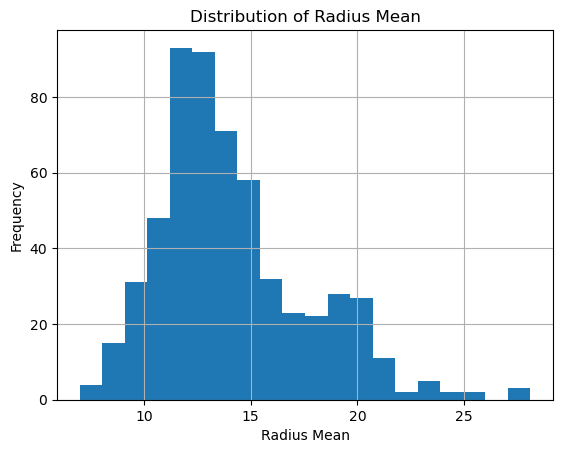

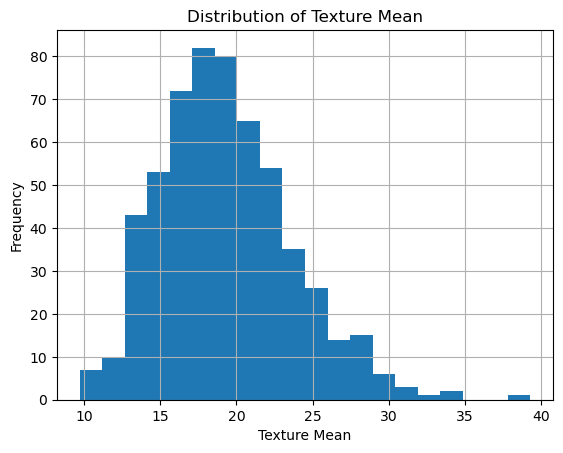

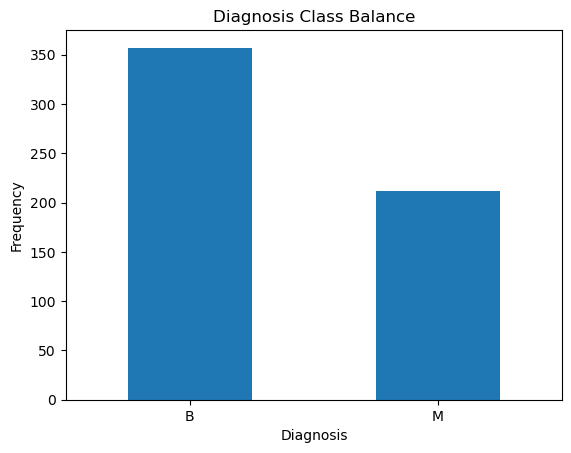

In [8]:
# CodeGrade step3

import matplotlib.pyplot as plt

# plot feature distributions for radius mean and texture mean

df_pandas['radius_mean'].hist(bins=20)
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Frequency')
plt.show()

df_pandas['texture_mean'].hist(bins=20)
plt.title('Distribution of Texture Mean')
plt.xlabel('Texture Mean')
plt.ylabel('Frequency')
plt.show()

# Plot diagnosis class balance, showing distribution of benign and malignant cases
# Plot diagnosis class balance
df_pandas['diagnosis'].value_counts().plot(kind='bar', rot=0)
plt.title("Diagnosis Class Balance")
plt.xlabel("Diagnosis")
plt.ylabel("Frequency")
plt.show()

### Step 4

The dataset you’re working with may contain inconsistencies, just as hospital records sometimes do. Cleaning the data helps ensure the findings are reliable and aligns with your responsibility to maintain high standards in healthcare analytics.

*   **Select the 50th row**
  * **Call this `row_50`**
* **Find the radius mean value value of the 50th row**
  * **Call this `radius_mean_value`**

In [9]:
# CodeGrade step4
row_50 = df_pandas.iloc[49,:]
radius_mean_value = row_50['radius_mean']
radius_mean_value

13.49

### Step 5

You’re tasked with helping oncologists identify critical patterns. By focusing on key features in the dataset, you’re pinpointing variables that significantly impact diagnoses, guiding doctors in making evidence-based decisions

* **Find the counts of the number of malignant and benign diagnosis**
  * **Call these `m_count` and `b_count`, respectively**
* **Then take the difference of malignant and benign**
  * **Call this `diagnosis_diff`**


In [10]:
# CodeGrade step5

print(df_pandas['diagnosis'].unique())
# count malignant diagnoses
m_count = df_pandas['diagnosis'].value_counts().get('M')
b_count = df_pandas['diagnosis'].value_counts().get('B')

# diff of malignant and benign
diagnosis_diff = (m_count - b_count)
diagnosis_diff

['M' 'B']


-145

### Step 6

A chief oncologist asks you to present findings to a panel. Visualizing the data allows you to communicate complex results effectively, enabling stakeholders to grasp critical insights that aid in policy decisions or medical strategies.

Create a *relative frequency* bar plot to show the distribution of benign and malignant cases. **bold text**
* **Call the Plot "Diagnosis Class Balance", the x-axis "Diagnosis", and the y-axis "Relative Frequency"**
* **Print the relative frequency of the Malignant cases**
  * **The last line of code should be**
    > **`relative_frequencies['M']`**



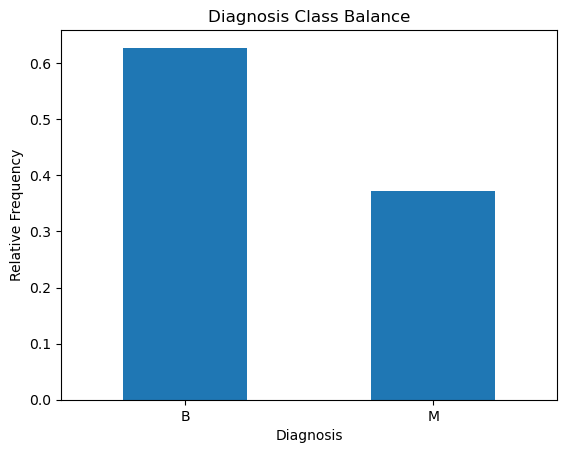

0.37258347978910367


In [11]:
#CodeGrade step6
rel_freq = df_pandas['diagnosis'].value_counts(normalize=True)

rel_freq.plot(kind='bar', rot=0)

plt.title('Diagnosis Class Balance')
plt.xlabel('Diagnosis')
plt.ylabel('Relative Frequency')
plt.show()

print(rel_freq['M'])

### Step 7

In the fight against cancer, the insights drawn depend heavily on the way data is processed. By creating new features or transforming existing ones, you're emulating how doctors refine raw observations into meaningful diagnostic indicators. This task helps extract deeper insights from the dataset, simulating the development of more precise diagnostic tools.

**Use PySpark's `.describe()` to see statistics for each feature, which will help you understand the ranges and distributions of the data.**

**Convert the PySpark DataFrame to Pandas for these calculations:**
* **maximum of the `fractal_dimension_mean`**
  * **Call this `max_fractal_dimension_mean`**
* **minimum of the `symmetry_mean`**
  * **Call this `min_symmetry_mean`**

**Take the absolute value of the difference of the `max_fractal_dimension_mean` and `min_symmetry_mean`.**
*  **Round to four decimal places**
*  **Call this `range_diff`**

In [12]:
# Run this code

# Use PySpark to describe the dataset
spark_df.describe().show()

+-------+--------------------+---------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+----+
|summary|                  id|diagnosis|       radius_mean|     texture_mean|   perimeter_mean|        area_mean|     smoothness_mean|   compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|         radius_se|        texture_se|      perimeter_se|          area_se|       smoothness_se|      compactness_

In [13]:
#CodeGrade step7
from pyspark.sql.functions import max, min
max_fractal_dimension_mean = spark_df.select(max('fractal_dimension_mean')).collect()[0][0]
min_symmetry_mean = spark_df.select(min('symmetry_mean')).collect()[0][0]

range_diff = round(abs(max_fractal_dimension_mean - min_symmetry_mean), 4)
range_diff

0.0086

### Step 8

You’re part of a team developing an AI system to assist doctors in identifying potential cancer cases. By building predictive models, you’re taking a crucial step toward automating diagnosis, helping reduce the workload on medical professionals while improving patient outcomes.


Let's suppose that you have reason to believe that the product of the 'radius_mean', 'texture_mean', and 'perimeter_mean' is meaningful to verify a diagnosis of Benign.

Use pandas to find the **bold text**
*   **Average of `radius_mean`, `texture_mean`, and `perimeter_mean` for each diagnosis (all three rounded to two decimal places) only for the Benign case**
  * **Call these, respectively, `radius_mean_b`, `texture_mean_b`, and `perimeter_mean_b`**
*   **Return only the product of the these three rounded means (and multiply in the order given)**

In [14]:
#CodeGrade step08
radius_mean_b = round(df_pandas[df_pandas['diagnosis'] == 'B']['radius_mean'].mean(), 2)
texture_mean_b = round(df_pandas[df_pandas['diagnosis'] == 'B']['texture_mean'].mean(), 2)
perimeter_mean_b = round(df_pandas[df_pandas['diagnosis'] == 'B']['perimeter_mean'].mean(), 2)

product = radius_mean_b * texture_mean_b * perimeter_mean_b
product

16990.71552

### Step 9

A hospital’s board of directors is reviewing the accuracy and reliability of your system before rolling it out. Evaluating the model ensures that it’s trustworthy and aligns with the hospital's commitment to high standards of care. Your analysis helps build confidence in the tool’s ability to assist in life-saving decisions.

Let's suppose that you have reason to believe that the average of the ratio of the `radius_mean` and the `perimeter_mean` are meaningful for the Malignant cases.

**Use pandas to compute**

*   **Average of the ratio of the `radius_mean` and the `perimeter_mean` only for the Malignant cases**
  * **Call this `ratios`**
*   **Round this to two decimal places**
  * **Call the result `mean_radius_perimeter_ratio`**


In [15]:
# CodeGrade step9

ratios = df_pandas[df_pandas['diagnosis'] == 'M']['radius_mean'].mean() / df_pandas[df_pandas['diagnosis'] == 'M']['perimeter_mean'].mean()
mean_radius_perimeter_ratio = round(ratios, 2)
mean_radius_perimeter_ratio


0.15

### Step 10


**Close the spark session, where verification that it is closed will result in the output of 'yes'**
*    ***Hint*: Use code similar to what was used in Step 1.**



In [17]:
# CodeGrade step10
spark.stop()
if (spark.getActiveSession()):
    print('yes')
else:
    print('no')

no
